This is KNN on the entire dataset including all labels

k = 1
  Train Accuracy: 1.0000 | Train Log Loss: 0.0000
  Test Accuracy:  0.7599 | Test Log Loss:  8.6549

k = 2
  Train Accuracy: 0.8601 | Train Log Loss: 0.1660
  Test Accuracy:  0.7052 | Test Log Loss:  5.5473

k = 3
  Train Accuracy: 0.8783 | Train Log Loss: 0.2428
  Test Accuracy:  0.7386 | Test Log Loss:  3.3728

k = 4
  Train Accuracy: 0.8502 | Train Log Loss: 0.2888
  Test Accuracy:  0.7356 | Test Log Loss:  2.6549



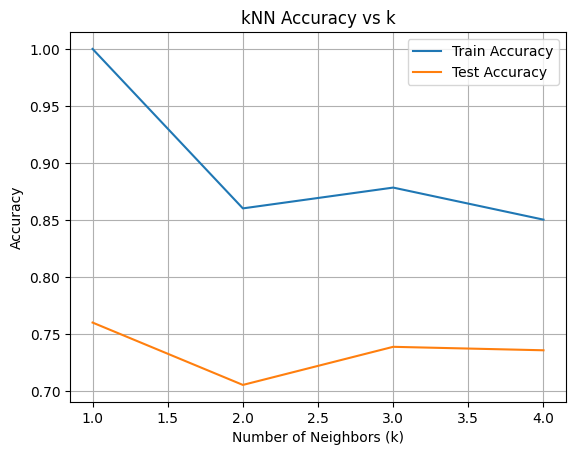

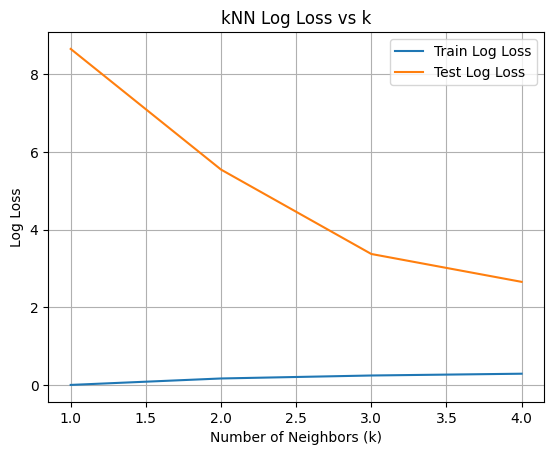

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss
import numpy as np

# File and setup
file_name = "cleaned_cleaned_data_combined_modified (11).csv"
random_state = 42
k_values = range(1, 5)

# Arrays to store metrics
train_accuracy_arr = []
test_accuracy_arr = []
train_log_loss_arr = []
test_log_loss_arr = []

if __name__ == "__main__":
    # Load data
    df = pd.read_csv(file_name)
    df = df.fillna(0)

    # Encode label column (categorical to integers)
    le = LabelEncoder()
    df['label_encoded'] = le.fit_transform(df['label'])

    # Shuffle
    df = df.sample(frac=1, random_state=random_state)

    # Features and target
    x = df.drop(columns=["label", "label_encoded"]).values
    y = df["label_encoded"].values

    # Train-test split
    n_train = int(0.8 * len(df))
    x_train, x_test = x[:n_train], x[n_train:]
    y_train, y_test = y[:n_train], y[n_train:]

    # Train and evaluate kNN for different k
    for k in k_values:
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(x_train, y_train)

        # Accuracy
        train_acc = clf.score(x_train, y_train)
        test_acc = clf.score(x_test, y_test)

        # Probabilistic predictions for log loss
        train_proba = clf.predict_proba(x_train)
        test_proba = clf.predict_proba(x_test)

        # Log loss (now using proper y and probability shape)
        train_loss = log_loss(y_train, train_proba, labels=clf.classes_)
        test_loss = log_loss(y_test, test_proba, labels=clf.classes_)

        # Store results
        train_accuracy_arr.append(train_acc)
        test_accuracy_arr.append(test_acc)
        train_log_loss_arr.append(train_loss)
        test_log_loss_arr.append(test_loss)

        # Output metrics
        print(f"k = {k}")
        print(f"  Train Accuracy: {train_acc:.4f} | Train Log Loss: {train_loss:.4f}")
        print(f"  Test Accuracy:  {test_acc:.4f} | Test Log Loss:  {test_loss:.4f}")
        print()

    # Plot accuracy
    plt.figure()
    plt.plot(k_values, train_accuracy_arr, label="Train Accuracy")
    plt.plot(k_values, test_accuracy_arr, label="Test Accuracy")
    plt.xlabel("Number of Neighbors (k)")
    plt.ylabel("Accuracy")
    plt.title("kNN Accuracy vs k")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot log loss
    plt.figure()
    plt.plot(k_values, train_log_loss_arr, label="Train Log Loss")
    plt.plot(k_values, test_log_loss_arr, label="Test Log Loss")
    plt.xlabel("Number of Neighbors (k)")
    plt.ylabel("Log Loss")
    plt.title("kNN Log Loss vs k")
    plt.legend()
    plt.grid(True)
    plt.show()


This is KNN on only select labels

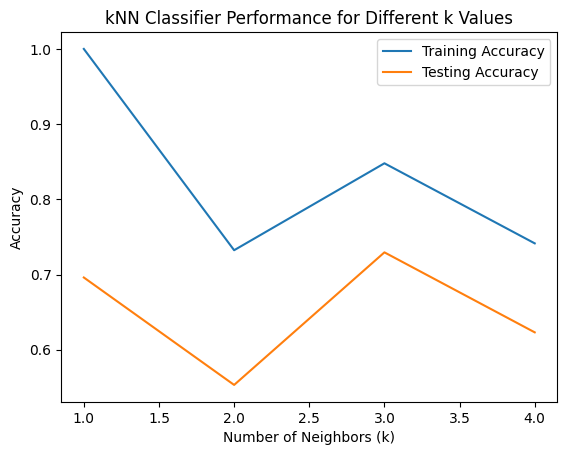

In [ ]:
"""
This Python file provides some useful code for reading the training file
"cleaned_data_combined.csv". You may adapt this code as you see fit. However,
keep in mind that the code provided does only basic feature transformations
to build a rudimentary kNN model in sklearn. Not all features are considered
in this code, and you should consider those features! Use this code
where appropriate, but don't stop here!
"""

import re
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

file_name = "cleaned_cleaned_data_combined_modified (11).csv"
random_state = 42
train_arr = []
test_arr = []
k_values = range(1,5)

def to_numeric(s):
    """Converts string `s` to a float.

    Invalid strings and NaN values will be converted to float('nan').
    """

    if isinstance(s, str):
        s = s.replace(",", '')
        s = pd.to_numeric(s, errors="coerce")
    return float(s)

if __name__ == "__main__":
    df = pd.read_csv(file_name)

    non_movie_columns = ['q1', 'label', 'q2', 'q4', 'drink_coke', 'drink_juice', 'drink_tea',
                      'drink_milk', 'drink_beer', 'drink_water', 'hot_sauce_hot',
                      'hot_sauce_mild', 'hot_sauce_medium','name',
                      'q7_parents', 'q7_siblings', 'q7_friends', 'q7_teachers',
                      'q7_strangers', 'q3_week day lunch', 'q3_week day dinner',
                      'q3_weekend lunch', 'q3_weekend dinner', 'q3_at a party',
                      'q3_late night snack']
    df = df[non_movie_columns]

    df = df.fillna(0)

    df = pd.get_dummies(df, columns=["label"], prefix="label")

    df = df.sample(frac=1, random_state=random_state)

    x = df.drop(columns=[col for col in df.columns if col.startswith("label_")]).values
    y = df[[col for col in df.columns if col.startswith("label_")]].values

    n_train = int(0.8 * len(df))
    x_train = x[:n_train]
    y_train = y[:n_train]

    x_test = x[n_train:]
    y_test = y[n_train:]
    for k in k_values:
      clf = KNeighborsClassifier(n_neighbors=k)
      clf.fit(x_train, y_train)
      train_acc = clf.score(x_train, y_train)
      test_acc = clf.score(x_test, y_test)
      train_arr.append(train_acc)
      test_arr.append(test_acc)

plt.plot(k_values, train_arr, label="Training Accuracy")
plt.plot(k_values, test_arr, label="Testing Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("kNN Classifier Performance for Different k Values")
plt.legend()
plt.show()